In [1]:
# فراخوانی کتابخانه های اولیه
import numpy
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# وارد کردن دیتاست
shahin= pd.read_csv('C:\\Users\\ShahinN\\Desktop\\iris.txt', header=None, names=['A', 'B', 'C','D', 'T'], skiprows=1)

In [3]:
shahin.head()

,A,B,C,D,T
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# آماده کردن دیتاست برای خوشه بندی 
shahin.drop('T', axis=1, inplace=True)

In [5]:
shahin.head(5)

,A,B,C,D
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# مشخص کردن تعداد خوشه های لازم
inertia_list=[]
for k in numpy.arange(1, 10):
    kmn= KMeans(n_clusters=k)
    kmn.fit(shahin.values)
    inertia_list.append(kmn.inertia_)
    
inertia_list

[680.8244,
 152.36870647733903,
 78.94084142614601,
 57.31787321428571,
 46.56163015873016,
 38.930963049671746,
 34.2045677933178,
 29.879919754370555,
 28.154411255411258]

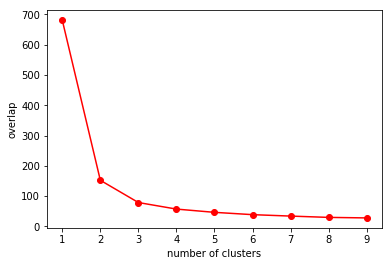

In [7]:
plt.plot(numpy.arange(1, 10), inertia_list, 'ro-')
plt.xlabel('number of clusters')
plt.ylabel('overlap')
plt.show()

In [8]:
# انجام عملیات خوشه بندی
kmn = KMeans(n_clusters=3)
kmn.fit(shahin.values)
labels = kmn.predict(shahin.values)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

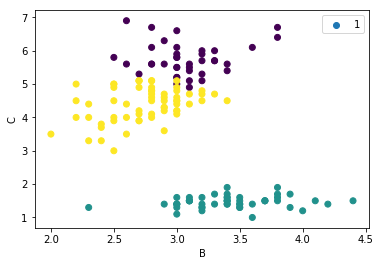

In [9]:
# ترسیم نمودار براکندگی دو بعدی براساس درآمد و سن به تفکیک خوشه ها
xs = shahin.values[:,1]
ys = shahin.values[:,2]
plt.scatter(xs, ys, c=labels)
plt.legend(labels, loc='upper right')
plt.xlabel('B')
plt.ylabel('C')
plt.show()

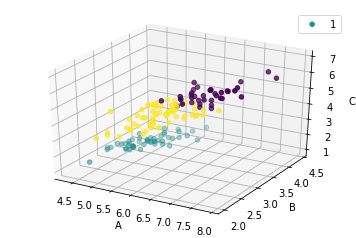

In [10]:
# ترسیم گراف پراکندگی سه بعدی
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = shahin.values[:,0]
ys = shahin.values[:,1]
zs = shahin.values[:,2]
ax.scatter(xs, ys, zs, c=labels)
ax.legend(labels, loc= 'upper right')
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')
plt.show()

In [11]:
columns = ['Cluster']
shahin2=pd.DataFrame(labels, index= None, columns=columns)
shahin2.head()

,Cluster
0,1
1,1
2,1
3,1
4,1


In [12]:
# خارج کردن دیتاست نهایی به همراه خوشه های مشتری
shahin_final=shahin.join(shahin2)
shahin_final
shahin_final.to_csv('C:\\Users\\ShahinN\\Desktop\\cluster.csv')